In [20]:
import numpy as np 
import pandas as pd

In [21]:
def process(filename, label):
    df = pd.read_excel(filename)
    X = []
    y = []
    slices = []
    max_langth = 0
    for  index, row in df.iterrows():
        if pd.isnull(row).any():
            length = len(slices)
            if length >= 500:
                print(filename, index)
            if length > max_langth:
                max_langth = length
            X.append(slices)
            y.append(label)
            slices = []   
        else:
            slices.append(row)
    X.append(slices)
    y.append(label)
    return X, y, max_langth

In [22]:
X, y, _ = process('pure_fall.xlsx', 5)
Bigdata = np.full((len(X), 500, 8), np.nan)
Biglabels = np.full((len(X), ), np.nan)
assert len(X) == len(y)
for i in range(len(X)):
    length = len(X[i])
    Bigdata[i, 0:length,:] = np.array(X[i])
    Biglabels[i] = y[i]


In [25]:
Bigdata.shape

(165, 500, 7)

In [24]:
Bigdata = Bigdata[:,:,1:]
np.savez('purefall.npz', X = Bigdata.astype(np.float32), y = Biglabels.astype(np.int32))

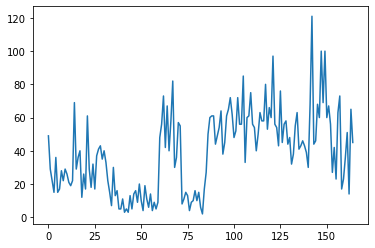

In [18]:
import matplotlib.pyplot as plt
num = np.isnan(Bigdata).all(axis=2).astype(np.int32).sum(axis=1)
plt.plot(range(len(num)), num)

In [26]:
Bigdata.shape

(165, 500, 7)

In [27]:
#组合
files= ['L1.npz', 'L2.npz', 'L3.npz', 'purefall.npz']
X = np.concatenate([np.load(file)['X'] for file in files], axis=0)
y = np.concatenate([np.load(file)['y'] for file in files], axis=0)

In [28]:
np.savez('lp.npz', X=X, y =y)